In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
from matplotlib import rc
import pandas as pd
import datetime
import seaborn as sns
import json, codecs
import os
from plot_strong_weak import plot_strong_weak
# from importnb import Notebook
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
# colors_ blue, red, yellow, green. purple gray light blue dark blue dark green
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
# palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
sns.set_palette(palette1)
today = datetime.date.today()
date = today
directory = ".\\" +  str(date) + "\\"
types = ['active']
names = ['']
variables = ['time [s]', '$f$ [Hz]', '$v$ [pu]']

fig_name = 'testing'
events_weak = {
    'Power drop': 2,
    'LoE = 1':2.5,
    '2 units shut down (centralized control)': 3.65,
    '2 units shut down (droop control)': 5.1
}
events_strong = {
    'Power drop': 2,
    'LoE = 1':2.5,
}

ModuleNotFoundError: No module named 'pyramses'

In [ ]:
ext = {}
A = []
B = []
C = variables*6
D = []
for name in names:
    for var in variables:
        for typ in types:
            A += [name]
for name in names:
    for typ in types:
        for var in variables:
            B += [typ]

for name in names:
    for typ in types:
        # ext1 = pyramses.extractor(directory + name + '_' + typ + ".trj")
        ext[name + '_' + typ] = pyramses.extractor(directory + name + '_' + typ + ".trj")
        D.append(ext[name + '_' + typ].getSync('G').S.time)
        D.append(ext[name + '_' + typ].getSync('G').S.value*50)
        D.append(ext[name + '_' + typ].getBus('114115').mag.value)

df = pd.DataFrame(zip(A, B, C, D), columns=['name','type', 'value','data'])
df.set_index(['name', 'type', 'value'], inplace=True)
df

In [ ]:
df.xs(('active','$f$ [Hz]'), level = ('type','value')) # cross section to see only an element of some levels

In [ ]:
df.swaplevel(0,1).sort_index() # inverts two levels

In [ ]:
fig,axs = plt.subplots(2,len(names), figsize = (20,2*3), sharex='col', sharey = 'row')
# fig.suptitle("\detokenize{"+ fig_title +"}")
fig.subplots_adjust(hspace=0.15, wspace = 0.05)
axs = axs.ravel()
for typ in types:
    sns.lineplot(ax=axs[0], y=variables(1), x=variables(0), data=df['data']['weak'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[1], y=variables(1), x=variables(0), data=df['data']['strong'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[2], y=variables(2), x=variables(0), data=df['data']['weak'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[3], y=variables(2), x=variables(0), data=df['data']['strong'][typ],linewidth=0.5, label=typ, legend = False)

for event in events_weak:  
    for ax in axs[0],axs[2]:
        ax.axvline(x = events_weak[event], color = 'grey', linewidth=0.5)
    axs[0].text(events_weak[event]+0.05, 50, event)
for event in events_strong:  
    for ax in axs[1],axs[3]:
        ax.axvline(x = events_strong[event], color = 'grey', linewidth=0.5)
    axs[1].text(events_strong[event]+0.05, 50, event)
axs[2].set_xlim([1.75,7.25])    
axs[3].set_xlim([1.75,7.25])    
fig.align_ylabels(axs[:])
axs[1].legend(loc = 'upper right', bbox_to_anchor=(1, 1.1), ncol=len(types))
axs[0].set_title('Weak grid')
axs[1].set_title('Strong grid')
parameters_left = '\n'.join(('H = 1.5 s',
                             '$\Delta P$ = -1.5 MW',
                             # "ATLs' load share = 20\%"
                            ))
parameters_right = '\n'.join(('H = 6 s',
                              '$\Delta P$ = -1.5 MW',
                              # "ATLs' load share = 20\%"
                             ))
props = dict(boxstyle='square', facecolor='white', alpha=0.5)
axs[0].text(0.98, 0.95,parameters_left, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
axs[1].text(0.98, 0.95,parameters_right, bbox=props, transform=axs[1].transAxes, ha = 'right', va = 'top')

str_i = "" 
i = 0
while True:
    if not os.path.exists(directory + fig_name + str_i + '.png'):
        fig.savefig(directory + fig_name + str_i + '.png',bbox_inches='tight', dpi = 300)

        break
    else:
        i += 1
        str_i = " " + str(i) 

In [ ]:
MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))

In [ ]:
P_active = 0
P_droop = 0
events = {
    'Power drop': 2,
    'LoE = 1':2.5
}
ext=pyramses.extractor(directory + "weak_active.trj")

for IMP in loads:
    P_active += ext.getInj(IMP).P.value
ext=pyramses.extractor(directory + "weak_droop.trj")
for IMP in loads:
    P_droop += ext.getInj(IMP).P.value

fig = plt.figure(None, (10,6))
ax1 = fig.subplots(1,1)
ext=pyramses.extractor(directory + "weak_active.trj")
ax1.plot(ext.getInj('IMP111001').P.time, P_active, label = 'P active')
ext=pyramses.extractor(directory + "weak_droop.trj")
ax1.plot(ext.getInj('IMP117501').P.time, P_droop,  label = 'P droop')
for event in events:
    ax1.axvline(x = events[event], color = 'grey')
    ax1.text(events[event]+0.02, 6.75, event)
    
ax1.set_xlim([1.75,7.25])
ax1.legend()

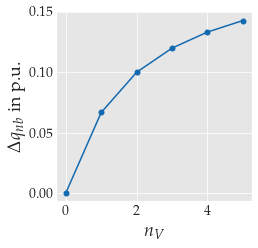

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
# plt.style.use("ggplot")
plt.style.use("thesis.mplstyle")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
# sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
# rc('font', **{'family': 'serif', 'serif': ['Palatino']})
# rc('text', usetex=True)
# colors_ blue, red, yellow, green. purple gray light blue dark blue dark green
# palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
# palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
# sns.set_palette(palette1)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
pt = 1/72.27

Qmax=0.2
Qmin=-0.2
ro1=1
ro2=1
V_s=np.arange(0,6)
DQ = np.zeros(len(V_s))
for i, V in enumerate(V_s):
    DQ[i] = min(max(V, 0)*Qmax*ro1*(Qmax)/(Qmax-Qmin+ro2*max(V,0)*Qmax),Qmax)
fig,axs = plt.subplots(1,1, sharex='col', sharey = 'row')

axs.plot(V_s,DQ, '-o')
axs.set_ylabel('$\Delta q_{nb}$ in p.u.')
axs.set_xlabel('$n_V$')

# parameters = '\n'.join(('$ Q_{max} = 0.2$',
#                         '$ Q_{min} = -0.2$',
#                         '$ Q^\star = 0$',
#                         '$ \\rho_1 = 1$',
#                         '$ \\rho_2 = 1$',
#                         ))

# props = dict(boxstyle='square', facecolor='white', alpha=0.5)
# axs[0].text(0.98, 0.95,parameters_left, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
# axs.text(0.9, 0.1,parameters, bbox=props, transform=axs.transAxes, ha = 'right', va = 'bottom')
plt.plot()
fig.savefig('DQ.png',bbox_inches='tight', dpi = 300)

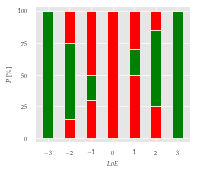

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib import rc

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
pt = 1/72.27

# 20 random samples
nsamples = 20
xmin, xmax = 0, 150
val = [100, 60, 20, 0, 20, 60, 100]
noactbot =  [0,15,30, 100, 50,25,0]
noacttop = [0,25,50, 0, 30,15,0]
sums = [sum(pair) for pair in zip(val, noactbot)]
dist = [0,15,30,50,25,0]
values = np.array([[0,100], [15,75],[30,50], [50,70],[25,85],[0,100]])
samples = np.random.random_sample((nsamples,2)) * (xmax-xmin) + xmin
values.sort(axis=1)
means = np.mean(values, axis=1)
# Find the length of the errorbar each side of the mean
half_range = values[:,1] - means
# Plot without markers and customize the errorbar
fig,axs = plt.subplots(1,1, figsize = (200*pt, 2*90*pt), sharex='col', sharey = 'row')
axs.bar([-3,-2,-1,0,1,2,3], noactbot, width=0.5, color= "r")
axs.bar([-3,-2,-1,0,1,2,3], val, bottom=noactbot, width=0.5, color= "g")
axs.bar([-3,-2,-1,0,1,2,3], noacttop, bottom=sums, width=0.5, color= "r")


# axs.errorbar(means, [-3,-2,-1,1,2,3], xerr=half_range, ls='',
                          # elinewidth=4)

# fig.grid()
# Set the y-range so we can see all the errorbars clearly
axs.set_yticks([0,25,50,75,100])

plt.ylim(-3,104)
axs.set_ylabel('$P$ [\%]')
axs.set_xlabel('$LoE$')
plt.show()
fig.savefig('Activation.png',bbox_inches='tight', dpi = 300)

# print(samples)
# print(values)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib import rc

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
pt = 1/72.27


P_start = 0.8
Delta = [-0.5,-0.3,-0.2,0,0.2,0.3,0.5]
loe = [-3,-2,-1,0,1,2,3]
fig,axs = plt.subplots(1,1, figsize = (200*pt, 2*90*pt), sharex='col', sharey = 'row')
axs.bar(loe, Delta, width=0.5)
axs.axhline(y = 0.5, color = 'grey', linestyle= 'dashed', linewidth=0.5)
axs.axhline(y = -0.5, color = 'grey', linestyle= 'dashed', linewidth=0.5)
# axs.axhline(y = 0.3, color = 'grey', linestyle= 'dashed', linewidth=0.5)
# axs.text(0.02, 0.5,'$P^\star$', transform=axs.transAxes, ha = 'left', va = 'bottom')
axs.text(0.02, 0.92,'$P_{max} - P^\star$', transform=axs.transAxes, ha = 'left', va = 'bottom')
axs.text(0.02, 0.07,'$P_{min} - P^\star$', transform=axs.transAxes, ha = 'left', va = 'top')

axs.set_ylabel('$\Delta P$ [p.u.]')
axs.set_xlabel('$LoE$')
plt.ylim(-0.6,0.6)
# plt.show()
fig.savefig('DPloe.png',bbox_inches='tight', dpi = 300)
# print(samples)
# print(values)